# Imports

In [1]:
import pandas as pd
import numpy as np
import cross_validation as cv

In [2]:
# to generate a perfect model:

# 1) we can build a perfect proba array, i.e., create 3737 + 26752 rows (validation dataset length) with [0,1] and [1,0] respectively 
yhat_perfect = np.array([[0,1]]*3737)
yhat_perfect = np.append(arr = yhat_perfect, values = np.array([[1,0]]*26752), axis = 0)

In [3]:
# 2) we can build the y_val with the first 3737 elements being of class 1 and the rest (26752) being of class 0
y_val_perfect = pd.Series(np.ones(3737, dtype = int))
y_val_perfect = y_val_perfect.append(pd.Series(np.zeros(26752, dtype = int)))

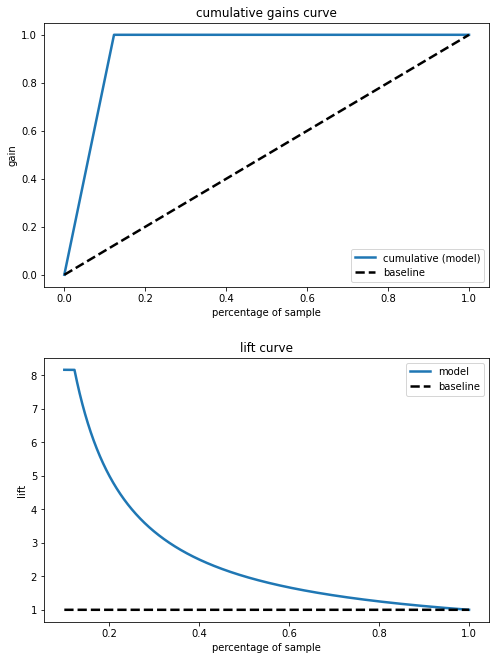

In [4]:
# finally, we can plot it and export the ranked list
table = cv.gain_lift_curve(yhat_perfect,y_val_perfect)
metrics, new_table = cv.precision_recall_at_k(table, 12200)
new_table.to_pickle(r"../data/processed/perfect_model_table.pkl")